# Importing Libraries

In [1]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath(".."))  # if notebook is in project/notebooks/


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt

from src.data_loader import get_dataloaders


In [3]:
train_gen, val_gen, test_gen = get_dataloaders(
    data_dir=r'C:\Users\kisho\Downloads\Aeiral object detection project\Data\classification_dataset',
    img_size=(224,224),
    batch_size=32
)


Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [4]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


In [5]:
for layer in base_model.layers:
    layer.trainable = False


In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [9]:
history1 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    verbose=1
)


Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9508 - loss: 0.1294 - val_accuracy: 0.9887 - val_loss: 0.0481
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9835 - loss: 0.0452 - val_accuracy: 0.9796 - val_loss: 0.0541
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9774 - val_loss: 0.0505
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9921 - loss: 0.0218 - val_accuracy: 0.9819 - val_loss: 0.0540
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9751 - val_loss: 0.0472


In [10]:
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [12]:
history2 = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9771 - loss: 0.0772 - val_accuracy: 0.9819 - val_loss: 0.0429
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.9850 - loss: 0.0550 - val_accuracy: 0.9819 - val_loss: 0.0427
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9899 - loss: 0.0415 - val_accuracy: 0.9819 - val_loss: 0.0439
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1102s 13s/step - accuracy: 0.9880 - loss: 0.0411 - val_accuracy: 0.9842 - val_loss: 0.0446
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.9925 - loss: 0.0320 - val_accuracy: 0.9864 - val_loss: 0.0438
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 308s 4s/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9864 - val_loss: 0.0444
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.9884 - loss: 0.0397 - val_accuracy: 0.9842 - val_loss: 0.0442
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 225s 3s/step - accuracy: 0.9925 - loss: 0.0307 - val_accuracy: 0.9842 -

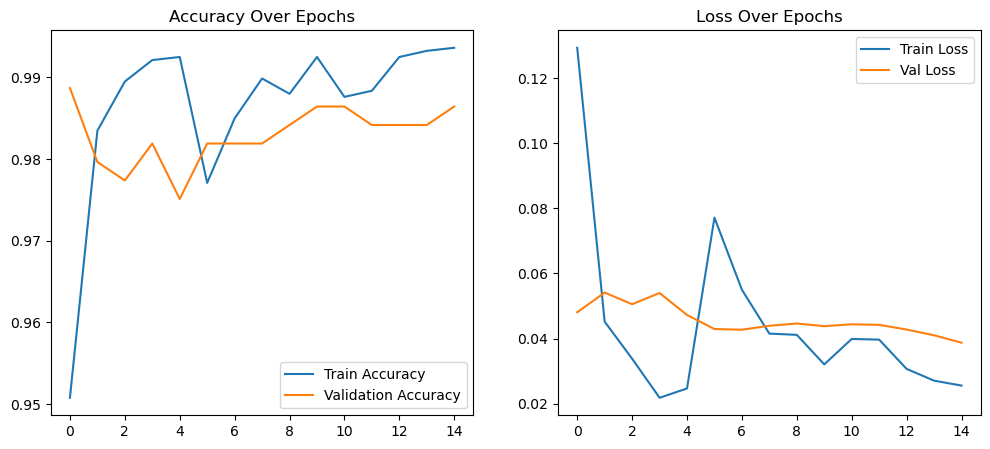

In [13]:
 def plot_history(h1, h2):
    acc = h1.history['accuracy'] + h2.history['accuracy']
    val_acc = h1.history['val_accuracy'] + h2.history['val_accuracy']
    loss = h1.history['loss'] + h2.history['loss']
    val_loss = h1.history['val_loss'] + h2.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title("Accuracy Over Epochs")

    # Loss
    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend()
    plt.title("Loss Over Epochs")

    plt.show()

plot_history(history1, history2)


In [14]:
test_loss, test_acc = model.evaluate(test_gen)
print("Test Accuracy:", test_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9721 - loss: 0.0599
Test Accuracy: 0.9720930457115173


In [17]:
model.save(r'C:\Users\kisho\Downloads\Aeiral object detection project\Models\efficientnetb0_finetuned.h5')
model.save(r'C:\Users\kisho\Downloads\Aeiral object detection project\Models\efficientnetb0_savedmodel.h5')
